In [1]:
!pip install geopandas

     |████████████████████████████████| 921kB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 66kB/s  eta 0:00:01    |████████████▏                   | 4.5MB 4.0MB/s eta 0:00:02
     |████████████████████████████████| 1.5MB 4.0MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 4.3MB/s eta 0:00:01


In [2]:
!pip install geoplot # or use !conda install geoplot -c conda-forge 

     |████████████████████████████████| 8.9MB 70kB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 3.3MB/s eta 0:00:01
     |████████████████████████████████| 18.0MB 35kB/s  eta 0:00:01    |██████████▊                     | 6.0MB 9.3MB/s eta 0:00:02     |████████████▋                   | 7.1MB 9.3MB/s eta 0:00:02     |███████████████████             | 10.7MB 3.1MB/s eta 0:00:03
     |████████████████████████████████| 102kB 791kB/s ta 0:00:011
  Created wheel for cartopy: filename=Cartopy-0.17.0-cp36-cp36m-linux_x86_64.whl size=9739079 sha256=b0dde882802c19a2fea0f598d23ec795a1061c71885cadd3454bab020627329b
  Stored in directory: /home/nbuser/.cache/pip/wheels/cd/cf/40/539f798f94e921e94fd376a5f9d213a6febe77754c0b187c73
Successfully built cartopy
  Created wheel for mapclassify: filename=mapclassify-2.1.1-cp36-none-any.whl size=29850 sha256=bad67d3bf19

Successfully built mapclassify pyshp


In [6]:
import geopandas
import geoplot

In [36]:
londonBoroughs = londonBoroughs.to_crs(epsg=4326)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


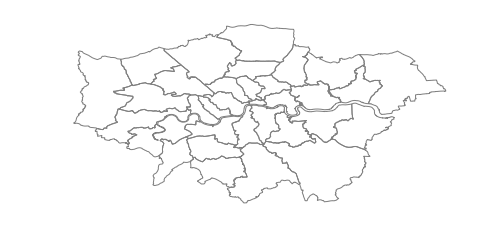

In [38]:
geoplot.polyplot(londonBoroughs, edgecolor='gray')

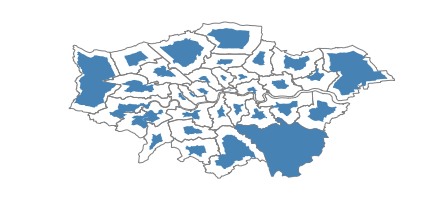

In [40]:
lon = londonBoroughs.iloc[7:10]
ax = geoplot.cartogram(
    londonBoroughs, scale='HECTARES', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(londonBoroughs, edgecolor='gray', ax=ax)

In [ ]:
import geopandas as gp

In [ ]:
import geoplot as gplt

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#import matplotlib

%matplotlib inline

In [42]:
import pandas as pd

In [54]:
import geoplot.crs as gcrs

In [ ]:
!pip install descartes

In [ ]:
import descartes

In [ ]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

In [10]:
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [43]:
data_path = "~/library/data/processed/borough-unemployment-and-business-data.csv" #use csv file
df = pd.read_csv(data_path)

df.head()

,Unnamed: 0,area,year,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate,NVQ3_rate,NVQ2_rate,NVQ1_rate
0,0,Barking and Dagenham,2011,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6,13.7,16.3,14.3
1,1,Barnet,2011,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7,10.9,9.3,7.5
2,2,Bexley,2011,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8,19.0,19.2,17.2
3,3,Brent,2011,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2,14.8,11.4,9.2
4,4,Bromley,2011,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4,17.5,12.8,10.5


In [46]:
df14 = df[df['year']==2014]

In [57]:
data_path = "./data/housing-density-borough.csv" #use csv file
df2 = pd.read_csv(data_path)

df2.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


In [58]:
df2_14 = df2[df2['Year']==2014]

In [59]:
df14 = df14.merge(df2_14, left_on='area', right_on='Name')

In [60]:
geojobs = londonBoroughs.merge(df14, left_on='NAME', right_on='area')
            #geodataframe       #dataframe

In [76]:
geojobs

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry,Unnamed: 0,area,year,3_year_survival_number,...,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,Kingston upon Thames,E09000021,3726.117,0.000,F,POLYGON ((-0.3306790213655372 51.3290110049202...,115,Kingston upon Thames,2014,790.0,...,E09000021,Kingston upon Thames,2014,GLA Population Projections,169991,3726.1,3726.1,45.6,37.3,4562.1
1,Croydon,E09000008,8649.441,0.000,F,POLYGON ((-0.06402119800271475 51.318637653932...,102,Croydon,2014,1510.0,...,E09000008,Croydon,2014,GLA Population Projections,376040,8650.4,8650.4,43.5,86.5,4347.1
2,Bromley,E09000006,15013.487,0.000,F,POLYGON ((0.01213098009807994 51.2995990536337...,100,Bromley,2014,1405.0,...,E09000006,Bromley,2014,GLA Population Projections,321834,15013.5,15013.5,21.4,150.1,2143.6
3,Hounslow,E09000018,5658.541,60.755,F,POLYGON ((-0.2445623525297459 51.4887021706344...,112,Hounslow,2014,1455.0,...,E09000018,Hounslow,2014,GLA Population Projections,265975,5597.8,5658.5,47.5,56.0,4751.4
4,Ealing,E09000009,5554.428,0.000,F,POLYGON ((-0.4118326476650196 51.5340838570488...,103,Ealing,2014,1940.0,...,E09000009,Ealing,2014,GLA Population Projections,342469,5554.4,5554.4,61.7,55.5,6165.7
5,Havering,E09000016,11445.735,210.763,F,POLYGON ((0.1586928741810193 51.51218596308873...,110,Havering,2014,925.0,...,E09000016,Havering,2014,GLA Population Projections,246328,11235.0,11445.7,21.9,112.3,2192.5
6,Hillingdon,E09000017,11570.063,0.000,F,POLYGON ((-0.4040719305943775 51.6131804175717...,111,Hillingdon,2014,1290.0,...,E09000017,Hillingdon,2014,GLA Population Projections,293325,11570.1,11570.1,25.4,115.7,2535.2
7,Harrow,E09000015,5046.330,0.000,F,POLYGON ((-0.4040719305943775 51.6131804175717...,109,Harrow,2014,1470.0,...,E09000015,Harrow,2014,GLA Population Projections,246575,5046.3,5046.3,48.9,50.5,4886.3
8,Brent,E09000005,4323.270,0.000,F,POLYGON ((-0.1965687041958952 51.5276540048934...,99,Brent,2014,1530.0,...,E09000005,Brent,2014,GLA Population Projections,321601,4323.3,4323.3,74.4,43.2,7438.8
9,Barnet,E09000003,8674.837,0.000,F,POLYGON ((-0.1998963619830926 51.6701668520024...,97,Barnet,2014,2295.0,...,E09000003,Barnet,2014,GLA Population Projections,375030,8674.8,8674.8,43.2,86.7,4323.2


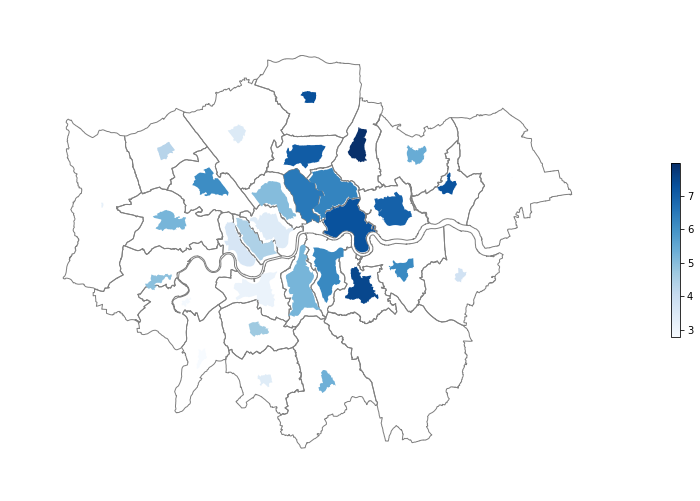

In [87]:
ax = geoplot.cartogram(
    geojobs, scale='Population_per_hectare', limits=(0, 1),
    hue='youth_unemployment_rate',projection=gcrs.OSGB(),
    cmap='Blues', legend=True, legend_var='hue', legend_kwargs={'shrink':0.2}, edgecolor='None', figsize=(14, 16)
)
geoplot.polyplot(geojobs, edgecolor='gray', ax=ax)